<a href="https://colab.research.google.com/github/aarondelgiudice/thinkful_data_bootcamp/blob/master/unit_4/lesson_4/nlp_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing Model

## Preprocessing

### Import Data

In [0]:
# load packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.model_selection import cross_val_score, train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [4]:
filename = 'inaugural'
df_prez = pd.read_csv(filename+".csv", index_col=0)
df_prez = df_prez[["fileid", "target", "era", "year", "president", "party",
                  "text_raw", "length_raw",	"text_clean",	"length_clean",
                  "text_parsed",	"length_parsed",	"text_nostops",
                  "length_nostops"]]
df_prez.head()

,fileid,target,era,year,president,party,text_raw,length_raw,text_clean,length_clean,text_parsed,length_parsed,text_nostops,length_nostops
0,1789-Washington.txt,NaN,founding,1789,washington,federalist,Fellow-Citizens of the Senate and of the House...,8619,fellow citizens of the senate and of the house...,8427,"['fellow', 'citizen', 'of', 'the', 'senate', '...",1394,"['fellow', 'citizen', 'senate', 'house', 'repr...",579
1,1793-Washington.txt,NaN,founding,1793,washington,federalist,"Fellow citizens, I am again called upon by the...",791,fellow citizens am again called upon by the vo...,763,"['fellow', 'citizen', 'be', 'again', 'call', '...",129,"['fellow', 'citizen', 'call', 'voice', 'countr...",56
2,1797-Adams.txt,NaN,founding,1797,adams,federalist,"When it was first perceived, in early times, t...",13877,when it was first perceived in early times tha...,13473,"['when', '-PRON-', 'be', 'first', 'perceive', ...",2257,"['perceive', 'early', 'time', 'middle', 'cours...",976
3,1801-Jefferson.txt,NaN,founding,1801,jefferson,democratic-republican,Friends and Fellow Citizens:\n\nCalled upon to...,10137,friends and fellow citizens called upon to und...,9835,"['friend', 'and', 'fellow', 'citizen', 'call',...",1688,"['friend', 'fellow', 'citizen', 'call', 'under...",723
4,1805-Jefferson.txt,NaN,founding,1805,jefferson,democratic-republican,"Proceeding, fellow citizens, to that qualifica...",12908,proceeding fellow citizens to that qualificati...,12598,"['proceed', 'fellow', 'citizen', 'to', 'that',...",2128,"['proceed', 'fellow', 'citizen', 'qualificatio...",902


In [7]:
# limit to 20th and 21st century presidents
df_prez_original = df_prez.copy()
df_prez = df_prez.loc[df_prez["year"]>1899]
print(df_prez.shape)
df_prez.head()

(30, 14)


,fileid,target,era,year,president,party,text_raw,length_raw,text_clean,length_clean,text_parsed,length_parsed,text_nostops,length_nostops
28,1901-McKinley.txt,NaN,progressive,1901,mckinley,republican,"My fellow-citizens, when we assembled here on ...",13408,my fellow citizens when we assembled here on t...,13061,"['-PRON-', 'fellow', 'citizen', 'when', '-PRON...",2179,"['fellow', 'citizen', 'assemble', 'th', 'march...",954
29,1905-Roosevelt.txt,NaN,progressive,1905,roosevelt,republican,"My fellow citizens, no people on earth have mo...",5568,my fellow citizens no people on earth have mor...,5428,"['-PRON-', 'fellow', 'citizen', 'no', 'people'...",969,"['fellow', 'citizen', 'people', 'earth', 'caus...",382
30,1909-Taft.txt,NaN,progressive,1909,taft,republican,My fellow citizens: Anyone who has taken the o...,32164,my fellow citizens anyone who has taken the oa...,31425,"['-PRON-', 'fellow', 'citizen', 'anyone', 'who...",5299,"['fellow', 'citizen', 'take', 'oath', 'take', ...",2326
31,1913-Wilson.txt,NaN,progressive,1913,wilson,democrat,There has been a change of government. It bega...,9563,there has been change of government it began t...,9298,"['there', 'have', 'be', 'change', 'of', 'gover...",1675,"['change', 'government', 'begin', 'year', 'ago...",703
32,1917-Wilson.txt,NaN,first world war,1917,wilson,democrat,My Fellow citizens: The four years which have ...,8395,my fellow citizens the four years which have e...,8192,"['-PRON-', 'fellow', 'citizen', 'the', 'four',...",1505,"['fellow', 'citizen', 'year', 'elapse', 'stand...",575


In [9]:
# set target value
print(df_prez["party"].unique())
df_prez["target"] = np.where(df_prez["party"]=="republican", 1, 0)
print(df_prez["target"].unique())
df_prez.head()

['republican' 'democrat']
[1 0]


,fileid,target,era,year,president,party,text_raw,length_raw,text_clean,length_clean,text_parsed,length_parsed,text_nostops,length_nostops
28,1901-McKinley.txt,1,progressive,1901,mckinley,republican,"My fellow-citizens, when we assembled here on ...",13408,my fellow citizens when we assembled here on t...,13061,"['-PRON-', 'fellow', 'citizen', 'when', '-PRON...",2179,"['fellow', 'citizen', 'assemble', 'th', 'march...",954
29,1905-Roosevelt.txt,1,progressive,1905,roosevelt,republican,"My fellow citizens, no people on earth have mo...",5568,my fellow citizens no people on earth have mor...,5428,"['-PRON-', 'fellow', 'citizen', 'no', 'people'...",969,"['fellow', 'citizen', 'people', 'earth', 'caus...",382
30,1909-Taft.txt,1,progressive,1909,taft,republican,My fellow citizens: Anyone who has taken the o...,32164,my fellow citizens anyone who has taken the oa...,31425,"['-PRON-', 'fellow', 'citizen', 'anyone', 'who...",5299,"['fellow', 'citizen', 'take', 'oath', 'take', ...",2326
31,1913-Wilson.txt,0,progressive,1913,wilson,democrat,There has been a change of government. It bega...,9563,there has been change of government it began t...,9298,"['there', 'have', 'be', 'change', 'of', 'gover...",1675,"['change', 'government', 'begin', 'year', 'ago...",703
32,1917-Wilson.txt,0,first world war,1917,wilson,democrat,My Fellow citizens: The four years which have ...,8395,my fellow citizens the four years which have e...,8192,"['-PRON-', 'fellow', 'citizen', 'the', 'four',...",1505,"['fellow', 'citizen', 'year', 'elapse', 'stand...",575


## Feature Engineering

In [14]:
df_prez.index

Int64Index([28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
            45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57],
           dtype='int64')

In [16]:
filename = 'inaugural_word_counts'
word_counts = pd.read_csv(filename+".csv", index_col=0)
word_counts = word_counts.loc[df_prez.index, :]
print(word_counts.shape)
word_counts.head()

(30, 2002)


,fileid,text_nostops,government,people,nation,state,great,country,world,power,shall,citizen,time,law,right,peace,good,new,man,american,public,america,duty,constitution,war,free,interest,freedom,united,union,life,year,hope,national,principle,know,let,fellow,work,spirit,...,scope,relative,faction,occasionally,widen,dependence,abolish,columbia,fullness,overcome,probably,uniform,betray,monarchy,complain,potent,strange,mischief,minister,corner,absence,clothe,joint,prudent,accession,inform,temple,annual,asia,levy,economical,rightfully,consume,opening,unmindful,active,sorrow,furnace,justification,channel
28,1901-McKinley.txt,"['fellow', 'citizen', 'assemble', 'th', 'march...",16,12,6,9,6,3,2,4,7,2,3,5,2,7,4,5,1,7,6,0,4,3,7,3,1,4,9,0,3,4,1,5,3,1,0,2,2,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
29,1905-Roosevelt.txt,"['fellow', 'citizen', 'people', 'earth', 'caus...",3,6,7,0,5,1,3,5,2,1,0,0,2,3,3,2,4,0,0,0,3,0,0,2,0,0,0,0,6,0,0,2,0,2,0,1,2,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
30,1909-Taft.txt,"['fellow', 'citizen', 'take', 'oath', 'take', ...",28,7,7,17,12,12,2,6,12,6,8,21,10,4,6,4,8,8,1,4,8,2,6,3,11,2,6,0,3,5,11,5,3,1,0,4,7,0,...,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1
31,1913-Wilson.txt,"['change', 'government', 'begin', 'year', 'ago...",9,2,6,0,14,1,2,0,6,0,1,4,4,0,3,5,13,0,0,0,3,0,0,0,1,0,0,0,11,3,2,1,1,1,2,0,2,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32,1917-Wilson.txt,"['fellow', 'citizen', 'year', 'elapse', 'stand...",1,8,9,2,5,0,6,7,9,3,3,0,4,6,1,3,4,2,0,2,4,0,4,3,5,2,2,0,6,3,1,5,6,4,3,2,0,5,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [17]:
filename = 'inaugural_tf_idf'
Tf_idf = pd.read_csv(filename+".csv", index_col=0)
Tf_idf = Tf_idf.loc[df_prez.index, :]
print(Tf_idf.shape)
Tf_idf.head()

(30, 3587)


,fileid,text_nostops,abandon,abandonment,abide,ability,able,abode,abolish,aboriginal,abound,abraham,abreast,abroad,absence,absent,absolute,absolutely,absorb,abstain,abundance,abundant,abundantly,abuse,accept,acceptance,access,accessible,accession,accident,accommodation,accompany,accomplish,accomplishment,accord,accordance,accordingly,account,accountability,accountable,...,wind,window,winter,wipe,wise,wisely,wish,withdraw,wither,withhold,witness,woman,womanhood,wonder,wonderful,word,worker,workingman,worldly,worldwide,worship,worth,worthily,worthy,wound,wrest,writ,write,writer,wrong,yearn,yes,yesterday,yield,yorktown,young,youth,zeal,zealous,zealously
28,1901-McKinley.txt,"['fellow', 'citizen', 'assemble', 'th', 'march...",0.030024,0.0,0.029139,0.024294,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.025490,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.024294,0.0,0.0,0.000000,0.0,0.000000,0.0,0.047546,...,0.0,0.0,0.0,0.0,0.022210,0.027543,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,1905-Roosevelt.txt,"['fellow', 'citizen', 'people', 'earth', 'caus...",0.000000,0.0,0.055075,0.000000,0.107034,0.0,0.000000,0.0,0.0,0.08337,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.07833,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.123281,0.000000,0.089867,0.000000,0.0,0.000000,0.0,0.0,0.0,0.041979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.041979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,1909-Taft.txt,"['fellow', 'citizen', 'take', 'oath', 'take', ...",0.000000,0.0,0.000000,0.000000,0.035212,0.0,0.016276,0.0,0.0,0.00000,0.0,0.031699,0.0,0.0,0.014268,0.018285,0.0,0.0,0.000000,0.0,0.0,0.035212,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.030212,0.0,0.0,0.044553,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.009207,0.011418,0.045063,0.018285,0.000000,0.014851,0.0,0.000000,0.0,0.0,0.0,0.009207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.01971,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,1913-Wilson.txt,"['change', 'government', 'begin', 'year', 'ago...",0.000000,0.0,0.000000,0.000000,0.036156,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.050138,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.060715,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.136986,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.034247,0.00000,0.056723,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,1917-Wilson.txt,"['fellow', 'citizen', 'year', 'elapse', 'stand...",0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.040201,0.0,0.0,0.0,0.062626,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.045463,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.185213,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.094603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Bag of Words

In [11]:
all_words = []
for text in df_prez['text_nostops']:
  for word in text:
    all_words.append(word)
    
#all_words.remove("-PRON-")
print(len(all_words))
print(all_words[:10])

from collections import Counter
common_words = [word[0] for word in Counter(all_words).most_common(2000)]
print(len(common_words))
print(type(common_words))
print(type(common_words[0]))
print(common_words[:10])

282203
['[', "'", 'f', 'e', 'l', 'l', 'o', 'w', "'", ',']
37
<class 'list'>
<class 'str'>
["'", ',', ' ', 'e', 'i', 'r', 'a', 'n', 't', 'o']


In [0]:
word_counts = pd.concat([df_prez[['fileid', 'text_nostops']],
                         pd.DataFrame(columns=common_words)], axis=1)
word_counts.loc[:, common_words] = 0

display(word_counts.columns)
word_counts.head()

Index(['fileid', 'text_nostops', 'government', 'people', 'nation', 'state',
       'great', 'country', 'world', 'power',
       ...
       'economical', 'rightfully', 'consume', 'opening', 'unmindful', 'active',
       'sorrow', 'furnace', 'justification', 'channel'],
      dtype='object', length=2002)

,fileid,text_nostops,government,people,nation,state,great,country,world,power,shall,citizen,time,law,right,peace,good,new,man,american,public,america,duty,constitution,war,free,interest,freedom,united,union,life,year,hope,national,principle,know,let,fellow,work,spirit,...,scope,relative,faction,occasionally,widen,dependence,abolish,columbia,fullness,overcome,probably,uniform,betray,monarchy,complain,potent,strange,mischief,minister,corner,absence,clothe,joint,prudent,accession,inform,temple,annual,asia,levy,economical,rightfully,consume,opening,unmindful,active,sorrow,furnace,justification,channel
0,1789-Washington.txt,"[fellow, citizen, senate, house, representativ...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1793-Washington.txt,"[fellow, citizen, call, voice, country, execut...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1797-Adams.txt,"[perceive, early, time, middle, course, americ...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1801-Jefferson.txt,"[friend, fellow, citizen, call, undertake, dut...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1805-Jefferson.txt,"[proceed, fellow, citizen, qualification, cons...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
%%time
# Create our data frame with features. This can take a while to run.

# Process each row, counting the occurrence of words in each sentence.
for i, text in enumerate(word_counts['text_nostops']):

  words = [word for word in text if word in common_words]

  # Populate the row with word counts.
  for word in words:
    word_counts.loc[i, word] += 1

  # This counter is just to make sure the kernel didn't hang.
  if i % 50 == 0:
    print("Processing row {}".format(i))

Processing row 0
Processing row 50
CPU times: user 1min 10s, sys: 607 ms, total: 1min 11s
Wall time: 1min 11s


In [0]:
word_counts.head()

,fileid,text_nostops,government,people,nation,state,great,country,world,power,shall,citizen,time,law,right,peace,good,new,man,american,public,america,duty,constitution,war,free,interest,freedom,united,union,life,year,hope,national,principle,know,let,fellow,work,spirit,...,scope,relative,faction,occasionally,widen,dependence,abolish,columbia,fullness,overcome,probably,uniform,betray,monarchy,complain,potent,strange,mischief,minister,corner,absence,clothe,joint,prudent,accession,inform,temple,annual,asia,levy,economical,rightfully,consume,opening,unmindful,active,sorrow,furnace,justification,channel
0,1789-Washington.txt,"[fellow, citizen, senate, house, representativ...",9,4,3,2,4,5,1,2,3,5,1,0,2,0,3,1,1,2,6,0,5,1,0,2,1,0,4,2,1,1,2,1,1,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1793-Washington.txt,"[fellow, citizen, call, voice, country, execut...",1,1,0,0,0,1,0,0,3,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1797-Adams.txt,"[perceive, early, time, middle, course, americ...",18,20,20,12,5,10,3,6,4,6,3,2,2,5,7,1,4,3,6,5,3,9,1,2,4,0,3,2,2,5,1,4,3,0,0,3,0,6,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1801-Jefferson.txt,"[friend, fellow, citizen, call, undertake, dut...",13,2,4,3,4,4,3,5,6,7,0,4,6,5,8,0,9,0,4,0,2,2,1,3,0,4,0,2,1,0,2,0,9,1,7,7,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1805-Jefferson.txt,"[proceed, fellow, citizen, qualification, cons...",3,0,6,12,1,5,2,4,7,10,6,6,4,4,4,1,3,1,14,0,8,6,4,1,8,2,1,3,2,4,0,0,4,2,2,8,1,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


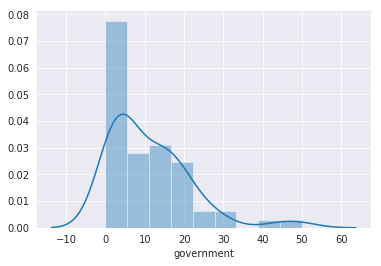

In [0]:
word_counts['government'].astype(int).describe()
sns.distplot(word_counts['government'].astype(int))
plt.show();

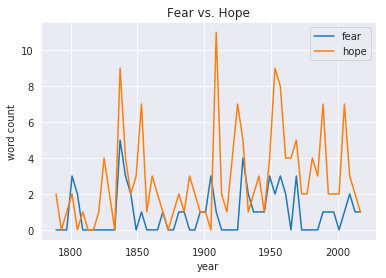

In [0]:
sns.lineplot(x=df_prez['year'], y=word_counts['fear'].astype(int), label='fear')
sns.lineplot(x=df_prez['year'], y=word_counts['hope'].astype(int), label='hope')
plt.ylabel('word count')
plt.legend()
plt.title('Fear vs. Hope')
plt.show();

#### Save data locally

In [0]:
from google.colab import files
filename = 'inaugural_word_counts'
word_counts.to_csv(filename+".csv", index=True)
files.download(filename+".csv")

### TF-IDF

In [0]:
# Create vectorizer model in order to get tf-idf for each sentence
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(
    max_df=0.5, # drop words that occur in more than half the paragraphs
    min_df=2, # only use words that appear at least twice
    stop_words='english', 
    lowercase=False,
    use_idf=True,# use inverse document frequencies in our weighting
    norm=u'l2', # Applies correction factor so long paragraphs and short paragraphs are equally weighted
    smooth_idf=True # Prevents divide-by-zero errors
    )

# Convert (text_sentence) from spacy object to string
text_list = word_counts['text_nostops'].astype(str)
text_list = [text.replace('PRON', "") for text in text_list]
print(type(text_list))

# Pass pandas series to our vectorizer model
text_tfidf = vectorizer.fit_transform(text_list)
print(type(text_tfidf))

<class 'list'>
<class 'scipy.sparse.csr.csr_matrix'>


In [0]:
# get list of features
terms = vectorizer.get_feature_names()
# shape
n = text_tfidf.shape[0]
# create list of dictionaries per paragraph
tfidf_bytext = [{} for _ in range(0,n)]
# for each sentence, lists the feature words and their tf-idf scores
for i, j in zip(*text_tfidf.nonzero()):
    tfidf_bytext[i][terms[j]] = text_tfidf[i, j]

# view dictionary
print(type(tfidf_bytext))
display(tfidf_bytext[0])

<class 'list'>


{'accomplish': array(0.03383471),
 'accordingly': array(0.06621976),
 'acknowledge': array(0.03943449),
 'actual': array(0.04793597),
 'actuate': array(0.06143198),
 'add': array(0.0316124),
 'addition': array(0.05468397),
 'address': array(0.04181606),
 'adopt': array(0.03550036),
 'adore': array(0.06621976),
 'adorn': array(0.06621976),
 'advance': array(0.02846291),
 'advancement': array(0.04459628),
 'advantage': array(0.03306049),
 'advantageously': array(0.06621976),
 'affair': array(0.02965218),
 'affect': array(0.03735145),
 'affection': array(0.04314819),
 'affectionate': array(0.06143198),
 'agency': array(0.04459628),
 'allot': array(0.06143198),
 'almighty': array(0.03028027),
 'alteration': array(0.06621976),
 'animosity': array(0.0521185),
 'anticipation': array(0.05771828),
 'anxiety': array(0.03943449),
 'appreciation': array(0.06143198),
 'ardent': array(0.04618249),
 'arduous': array(0.04618249),
 'arise': array(0.03640018),
 'article': array(0.08919257),
 'assemblage

In [0]:
# create dataframe for this feature set
tf_idf = pd.concat([df_prez[['fileid', 'text_nostops']],
                    pd.DataFrame(columns=terms)], axis=1)
tf_idf.loc[:, terms] = 0

tf_idf.head()

,fileid,text_nostops,abandon,abandonment,abide,ability,able,abode,abolish,aboriginal,abound,abraham,abreast,abroad,absence,absent,absolute,absolutely,absorb,abstain,abundance,abundant,abundantly,abuse,accept,acceptance,access,accessible,accession,accident,accommodation,accompany,accomplish,accomplishment,accord,accordance,accordingly,account,accountability,accountable,...,wind,window,winter,wipe,wise,wisely,wish,withdraw,wither,withhold,witness,woman,womanhood,wonder,wonderful,word,worker,workingman,worldly,worldwide,worship,worth,worthily,worthy,wound,wrest,writ,write,writer,wrong,yearn,yes,yesterday,yield,yorktown,young,youth,zeal,zealous,zealously
0,1789-Washington.txt,"[fellow, citizen, senate, house, representativ...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1793-Washington.txt,"[fellow, citizen, call, voice, country, execut...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1797-Adams.txt,"[perceive, early, time, middle, course, americ...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1801-Jefferson.txt,"[friend, fellow, citizen, call, undertake, dut...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1805-Jefferson.txt,"[proceed, fellow, citizen, qualification, cons...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
%%time
counter = 0
for i in tfidf_bytext:
    for k, v in i.items():
        tf_idf.loc[counter, k] = v
    counter += 1
    
display(tf_idf.head())

,fileid,text_nostops,abandon,abandonment,abide,ability,able,abode,abolish,aboriginal,abound,abraham,abreast,abroad,absence,absent,absolute,absolutely,absorb,abstain,abundance,abundant,abundantly,abuse,accept,acceptance,access,accessible,accession,accident,accommodation,accompany,accomplish,accomplishment,accord,accordance,accordingly,account,accountability,accountable,...,wind,window,winter,wipe,wise,wisely,wish,withdraw,wither,withhold,witness,woman,womanhood,wonder,wonderful,word,worker,workingman,worldly,worldwide,worship,worth,worthily,worthy,wound,wrest,writ,write,writer,wrong,yearn,yes,yesterday,yield,yorktown,young,youth,zeal,zealous,zealously
0,1789-Washington.txt,"[fellow, citizen, senate, house, representativ...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.033834708916156774,0,0,0,0.0662197642502629,0,0,0,...,0,0,0,0,0.061866021315661796,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1793-Washington.txt,"[fellow, citizen, call, voice, country, execut...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0.16315911751713275,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1797-Adams.txt,"[perceive, early, time, middle, course, americ...",0.030995997179053426,0,0,0,0,0,0,0.0405342862937145,0,0,0,0.02631450588833742,0,0,0,0,0,0,0,0,0,0.029230664703851064,0,0,0,0,0,0.049085145930922364,0,0,0,0,0.029230664703851064,0,0,0,0,0,...,0,0,0,0,0.022928975350684343,0,0.0673354126255367,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.03553235405701779,0,0
3,1801-Jefferson.txt,"[friend, fellow, citizen, call, undertake, dut...",0.04010253062651196,0,0,0,0,0,0,0,0,0,0,0.03404563086686948,0,0,0.04597165590680112,0,0,0,0,0,0,0.07563709725149016,0,0,0,0,0,0,0,0,0,0,0.03781854862574508,0,0,0,0,0,...,0,0,0,0,0.02966544134468905,0,0.029039453400660786,0,0,0,0,0,0,0,0.05244314122650629,0,0,0,0,0,0,0,0,0,0,0,0,0.035820863927364256,0,0.0593308826893781,0,0,0,0,0,0,0,0.04597165590680112,0,0
4,1805-Jefferson.txt,"[proceed, fellow, citizen, qualification, cons...",0,0,0,0,0.030151654609926744,0,0,0.04181142688920614,0,0,0,0,0,0,0,0,0,0,0,0,0,0.06030330921985349,0,0,0,0,0,0,0,0,0,0,0.030151654609926744,0,0,0,0,0,...,0,0,0,0,0,0,0.02315233135101668,0,0,0,0.08799121155052367,0,0,0,0,0.023651413758041404,0,0,0,0,0,0,0,0,0,0,0,0.028558957342742084,0,0,0,0,0,0,0,0,0,0.10995568638543628,0,0


CPU times: user 59.3 s, sys: 489 ms, total: 59.8 s
Wall time: 59.8 s


In [0]:
from google.colab import files
filename = 'inaugural_tf_idf'
tf_idf.to_csv(filename+".csv", index=True)
files.download(filename+".csv")

## Model Selection

In [0]:
# set data for modeling
Data_bow = word_counts.drop(['fileid', 'text_nostops'], 1)
Data_tfidf = Tf_idf.drop(['fileid', 'text_nostops'], 1)
target = df_prez["target"]

In [0]:
# define dataframes to store results
df_desc = pd.DataFrame()
df_score = pd.DataFrame()

# define supervised modeling function
def supervised_clf(model, data, target, test_size=0.25, stratify=None, cv=5):
  """
  """
  #from sklearn.model_selection import train_test_split, cross_val_score
  
  X_train, X_test, y_train, y_test = train_test_split(
      data, target, test_size=test_size, stratify=stratify, random_state=42)
  
  model = model.fit(X_train, y_train)
  train_score = model.score(X_train, y_train)
  test_score = model.score(X_test, y_test)
  print('\nTraining score:', train_score)
  print('\nValidation score:', test_score)
  
  cv_scores = cross_val_score(model, data, target, cv=cv)
  cv_score = np.round(np.mean(cv_scores)*100, 4)
  variance = np.round(np.var(cv_scores)*100, 4)
  print('\nCross validation: {} +/- {}%'.format(cv_score, variance))
  
  return pd.DataFrame([[train_score, test_score, cv_score, variance]],
                      columns=["train_score", "test_score", "cv_score", "variance"])

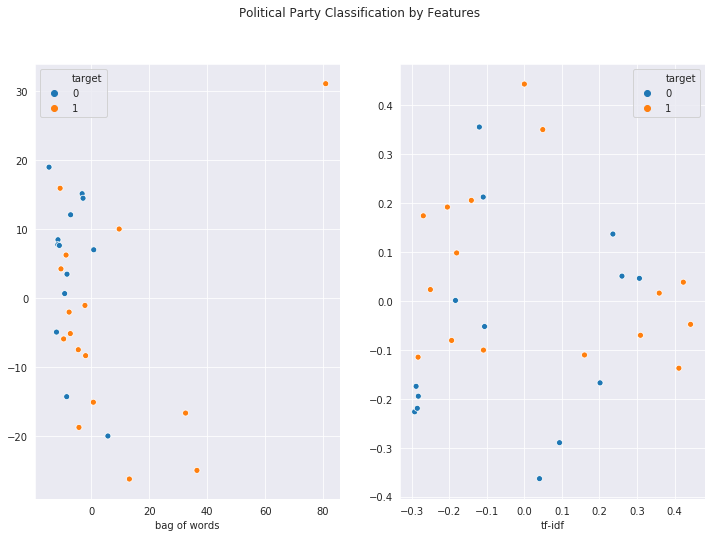

In [27]:
from sklearn.decomposition import PCA
# reduce data to two dimensions
bow_2D = PCA(n_components=2).fit_transform(Data_bow)
tfidf_2D = PCA(n_components=2).fit_transform(Data_tfidf)

def plotting_func(label_list, data_list=[], num_plots=2, title="placeholder"):
  """
  """
  num_plots = range(0,num_plots)
  
  # plot target variable
  fig, axes = plt.subplots(1, len(num_plots), figsize=(12,8))

  sns.scatterplot(data_list[0][:,0], data_list[0][:,1],
                  hue=label_list[0], ax=axes[num_plots[0]])
  axes[0].set_xlabel("bag of words")

  sns.scatterplot(data_list[1][:,0], data_list[1][:,1],
                  hue=label_list[1], ax=axes[num_plots[1]])
  axes[1].set_xlabel("tf-idf")

  fig.suptitle(title+" Classification by Features")
  plt.show;
  
# plot recession target variable
data_list = [bow_2D, tfidf_2D]
label_list = [target, target]
plotting_func(label_list, data_list, "Political Party")

#### Naive Bayes

In [25]:
#from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()
df_desc = df_desc.append(pd.DataFrame([["bag of words", "naive bayes"]],
                                      columns=["features", "model"]),
                        ignore_index=True)
print("Features: {}\nModel: {}\n".format(
    df_desc["features"].iloc[-1], df_desc["model"].iloc[-1]))
df_score = df_score.append(supervised_clf(model=bayes,
                                          data=Data_bow,
                                          target=target,
                                          stratify=target),
                          ignore_index=True)

Features: bag of words
Model: naive bayes


Training score: 1.0

Validation score: 0.625

Cross validation: 53.4286 +/- 1.2956%


In [26]:
df_desc = df_desc.append(pd.DataFrame([["tf-idf", "naive bayes"]],
                                      columns=["features", "model"]),
                        ignore_index=True)
print("Features: {}\nModel: {}\n".format(
    df_desc["features"].iloc[-1], df_desc["model"].iloc[-1]))
df_score = df_score.append(supervised_clf(model=bayes,
                                          data=Data_tfidf,
                                          target=target,
                                          stratify=target),
                          ignore_index=True)

Features: tf-idf
Model: naive bayes


Training score: 1.0

Validation score: 0.625

Cross validation: 56.7619 +/- 0.4004%


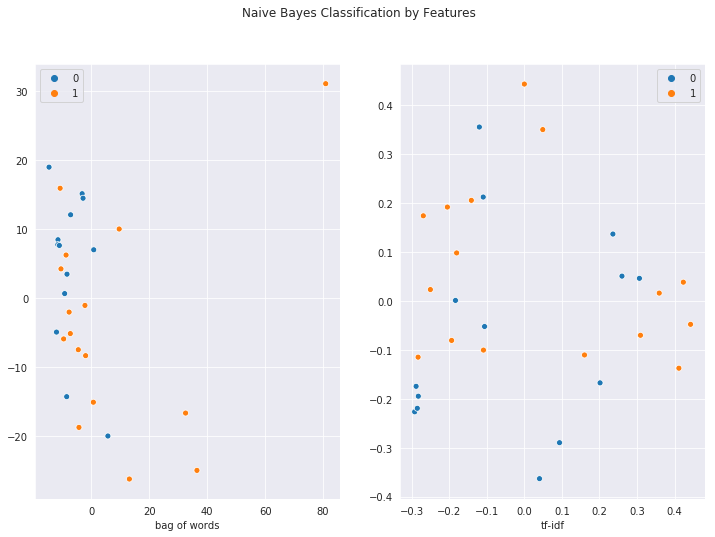

In [29]:
pred_bow = bayes.fit(Data_bow, target).predict(Data_bow)
pred_tfidf = bayes.fit(Data_tfidf, target).predict(Data_tfidf)
labels_list = [pred_bow, pred_tfidf]

plotting_func(labels_list, data_list, 2, "Naive Bayes")

#### L1 Regularization

In [32]:
#from sklearn.linear_model import LogisticRegression
# set penalty to 'l1'
# set penalty to 'saga'
lasso = LogisticRegression(penalty='l1',
                           solver='saga',
                           multi_class='auto',
                           random_state=42,
                           #max_iter=1500
                          )
df_desc = df_desc.append(pd.DataFrame([["bag of words", "lasso regression"]],
                                      columns=["features", "model"]),
                        ignore_index=True)
print("Features: {}\nModel: {}\n".format(
    df_desc["features"].iloc[-1], df_desc["model"].iloc[-1]))
df_score = df_score.append(supervised_clf(model=lasso,
                                          data=Data_bow,
                                          target=target,
                                          stratify=target),
                          ignore_index=True)

Features: bag of words
Model: lasso regression


Training score: 1.0

Validation score: 0.625


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)



Cross validation: 56.2857 +/- 1.8344%


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [33]:
df_desc = df_desc.append(pd.DataFrame([["tf-idf", "lasso regression"]],
                                      columns=["features", "model"]),
                        ignore_index=True)
print("Features: {}\nModel: {}\n".format(
    df_desc["features"].iloc[-1], df_desc["model"].iloc[-1]))
df_score = df_score.append(supervised_clf(model=lasso,
                                          data=Data_tfidf,
                                          target=target,
                                          stratify=target),
                          ignore_index=True)

Features: tf-idf
Model: lasso regression


Training score: 0.5454545454545454

Validation score: 0.5

Cross validation: 53.4286 +/- 0.1845%


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


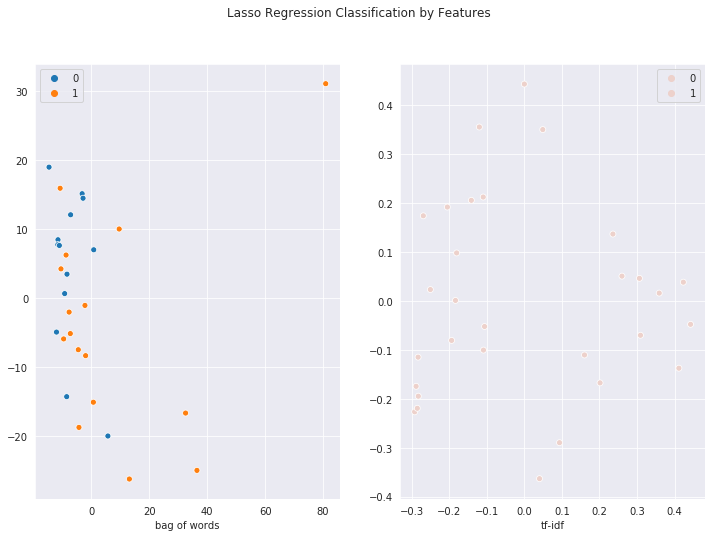

In [34]:
pred_bow = lasso.fit(Data_bow, target).predict(Data_bow)
pred_tfidf = lasso.fit(Data_tfidf, target).predict(Data_tfidf)
labels_list = [pred_bow, pred_tfidf]

plotting_func(labels_list, data_list, 2, "Lasso Regression")

#### L2 Regularization

In [35]:
#from sklearn.linear_model import LogisticRegression
# set penalty to 'l2'
# set solver to 'lbfgs'
ridge = LogisticRegression(penalty='l2',
                           solver='lbfgs',
                           #multi_class='multinomial',
                           random_state=42)
df_desc = df_desc.append(pd.DataFrame([["bag of words", "ridge regression"]],
                                      columns=["features", "model"]),
                        ignore_index=True)
print("Features: {}\nModel: {}\n".format(
    df_desc["features"].iloc[-1], df_desc["model"].iloc[-1]))
df_score = df_score.append(supervised_clf(model=ridge,
                                          data=Data_bow,
                                          target=target,
                                          stratify=target),
                          ignore_index=True)

Features: bag of words
Model: ridge regression


Training score: 1.0

Validation score: 0.75

Cross validation: 62.9524 +/- 1.6629%


In [36]:
df_desc = df_desc.append(pd.DataFrame([["tf-idf", "ridge regression"]],
                                      columns=["features", "model"]),
                        ignore_index=True)
print("Features: {}\nModel: {}\n".format(
    df_desc["features"].iloc[-1], df_desc["model"].iloc[-1]))
df_score = df_score.append(supervised_clf(model=ridge,
                                          data=Data_tfidf,
                                          target=target,
                                          stratify=target),
                          ignore_index=True)

Features: tf-idf
Model: ridge regression


Training score: 1.0

Validation score: 0.5

Cross validation: 53.4286 +/- 0.1845%


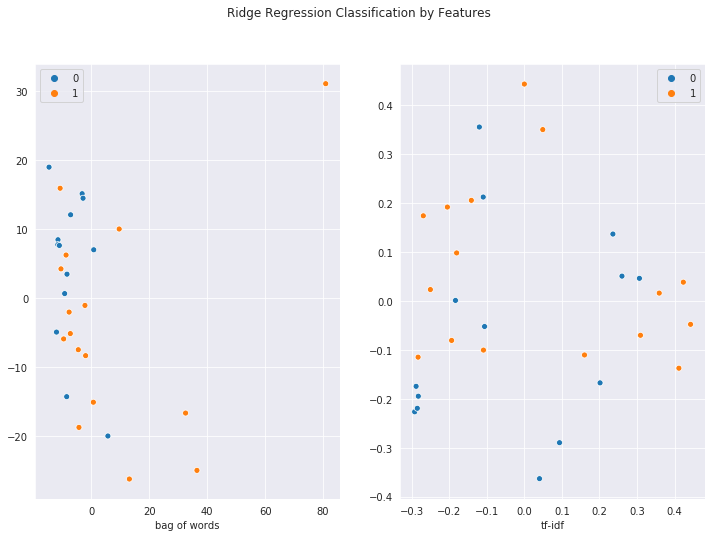

In [37]:
pred_bow = ridge.fit(Data_bow, target).predict(Data_bow)
pred_tfidf = ridge.fit(Data_tfidf, target).predict(Data_tfidf)
labels_list = [pred_bow, pred_tfidf]

plotting_func(labels_list, data_list, 2, "Ridge Regression")

#### Random Forest

In [38]:
#from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
df_desc = df_desc.append(pd.DataFrame([["bag of words", "random forest"]],
                                      columns=["features", "model"]),
                        ignore_index=True)
print("Features: {}\nModel: {}\n".format(
    df_desc["features"].iloc[-1], df_desc["model"].iloc[-1]))
df_score = df_score.append(supervised_clf(model=rfc,
                                          data=Data_bow,
                                          target=target,
                                          stratify=target),
                          ignore_index=True)

Features: bag of words
Model: random forest


Training score: 1.0

Validation score: 0.625

Cross validation: 68.4762 +/- 4.8929%


In [39]:
df_desc = df_desc.append(pd.DataFrame([["tf-idf", "random forest"]],
                                      columns=["features", "model"]),
                        ignore_index=True)
print("Features: {}\nModel: {}\n".format(
    df_desc["features"].iloc[-1], df_desc["model"].iloc[-1]))
df_score = df_score.append(supervised_clf(model=rfc,
                                          data=Data_tfidf,
                                          target=target,
                                          stratify=target),
                          ignore_index=True)

Features: tf-idf
Model: random forest


Training score: 1.0

Validation score: 0.5

Cross validation: 52.7619 +/- 3.0035%


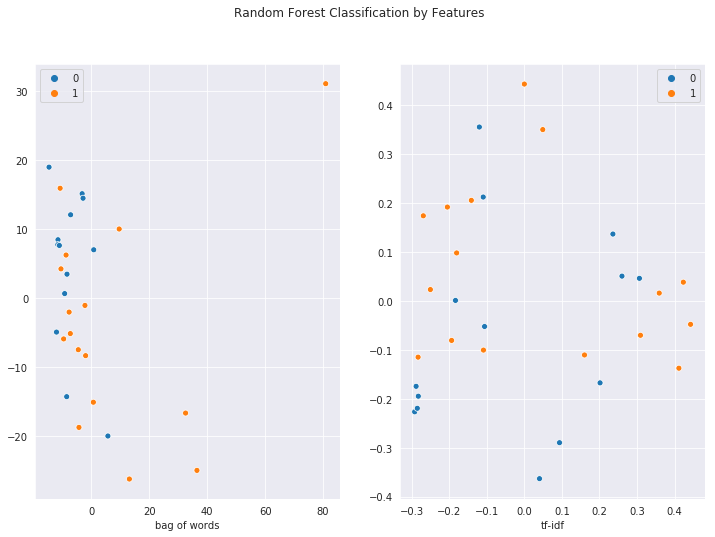

In [41]:
pred_bow = rfc.fit(Data_bow, target).predict(Data_bow)
pred_tfidf = rfc.fit(Data_tfidf, target).predict(Data_tfidf)
labels_list = [pred_bow, pred_tfidf]

plotting_func(labels_list, data_list, 2, "Random Forest")

#### Support Vector Machines

In [42]:
#from sklearn.svm import SVC
# set gamma to 'scale'
svc = SVC(gamma='scale', random_state=42)
df_desc = df_desc.append(pd.DataFrame([["bag of words", "svm"]],
                                      columns=["features", "model"]),
                        ignore_index=True)
print("Features: {}\nModel: {}\n".format(
    df_desc["features"].iloc[-1], df_desc["model"].iloc[-1]))
df_score = df_score.append(supervised_clf(model=svc,
                                          data=Data_bow,
                                          target=target,
                                          stratify=target),
                          ignore_index=True)

Features: bag of words
Model: svm


Training score: 0.9545454545454546

Validation score: 0.625

Cross validation: 56.2857 +/- 1.8344%


In [43]:
df_desc = df_desc.append(pd.DataFrame([["tf-idf", "svm"]],
                                      columns=["features", "model"]),
                        ignore_index=True)
print("Features: {}\nModel: {}\n".format(
    df_desc["features"].iloc[-1], df_desc["model"].iloc[-1]))
df_score = df_score.append(supervised_clf(model=svc,
                                          data=Data_tfidf,
                                          target=target,
                                          stratify=target),
                          ignore_index=True)

Features: tf-idf
Model: svm


Training score: 1.0

Validation score: 0.5

Cross validation: 53.4286 +/- 0.1845%


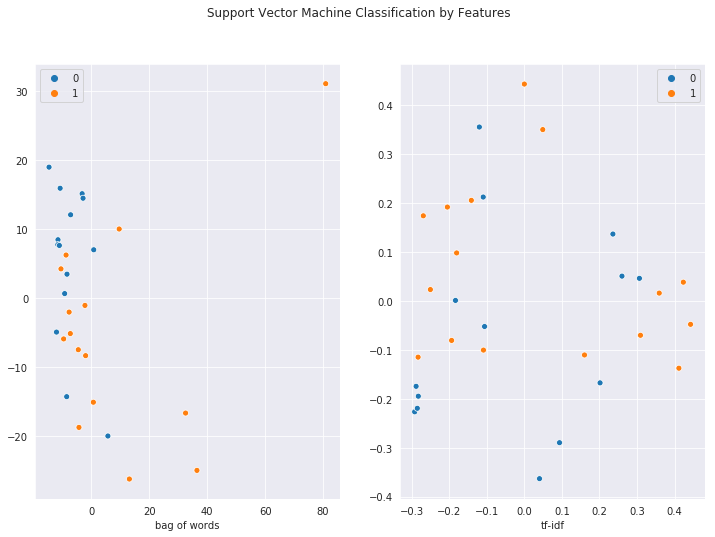

In [44]:
pred_bow = svc.fit(Data_bow, target).predict(Data_bow)
pred_tfidf = svc.fit(Data_tfidf, target).predict(Data_tfidf)
labels_list = [pred_bow, pred_tfidf]

plotting_func(labels_list, data_list, 2, "Support Vector Machine")

#### SGD Classifier

In [45]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
df_desc = df_desc.append(pd.DataFrame([["bag of words", "sgd"]],
                                      columns=["features", "model"]),
                        ignore_index=True)
print("Features: {}\nModel: {}\n".format(
    df_desc["features"].iloc[-1], df_desc["model"].iloc[-1]))
df_score = df_score.append(supervised_clf(model=sgd,
                                          data=Data_bow,
                                          target=target,
                                          stratify=target),
                          ignore_index=True)

Features: bag of words
Model: sgd


Training score: 1.0

Validation score: 0.75

Cross validation: 56.7619 +/- 1.5115%


In [46]:
df_desc = df_desc.append(pd.DataFrame([["tf-idf", "sgd"]],
                                      columns=["features", "model"]),
                        ignore_index=True)
print("Features: {}\nModel: {}\n".format(
    df_desc["features"].iloc[-1], df_desc["model"].iloc[-1]))
df_score = df_score.append(supervised_clf(model=sgd,
                                          data=Data_tfidf,
                                          target=target,
                                          stratify=target),
                          ignore_index=True)

Features: tf-idf
Model: sgd


Training score: 1.0

Validation score: 0.5

Cross validation: 60.7619 +/- 3.5216%


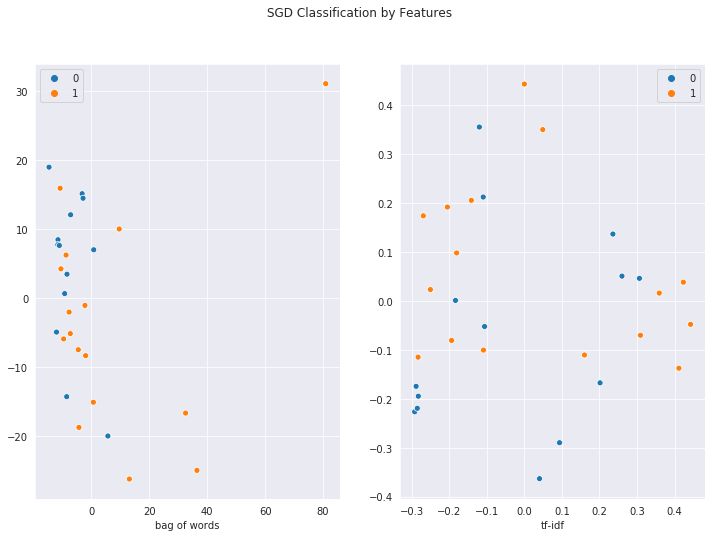

In [47]:
pred_bow = sgd.fit(Data_bow, target).predict(Data_bow)
pred_tfidf = sgd.fit(Data_tfidf, target).predict(Data_tfidf)
labels_list = [pred_bow, pred_tfidf]

plotting_func(labels_list, data_list, 2, "SGD")

### Analysis

In [48]:
df_score[["cv_score", "variance"]].describe()

,cv_score,variance
count,12.000000,12.000000
mean,57.063500,1.709225
std,4.780193,1.477919
min,52.761900,0.184500
25%,53.428600,0.346425
50%,56.285700,1.587200
75%,57.761900,2.126675
max,68.476200,4.892900


In [49]:
df_test = pd.concat([df_desc, df_score], axis=1)
df_test.sort_values(by=["cv_score"], ascending=False).head(10)

,features,model,train_score,test_score,cv_score,variance
6,bag of words,random forest,1.000000,0.625,68.4762,4.8929
4,bag of words,ridge regression,1.000000,0.750,62.9524,1.6629
11,tf-idf,sgd,1.000000,0.500,60.7619,3.5216
1,tf-idf,naive bayes,1.000000,0.625,56.7619,0.4004
10,bag of words,sgd,1.000000,0.750,56.7619,1.5115
2,bag of words,lasso regression,1.000000,0.625,56.2857,1.8344
8,bag of words,svm,0.954545,0.625,56.2857,1.8344
0,bag of words,naive bayes,1.000000,0.625,53.4286,1.2956
3,tf-idf,lasso regression,0.545455,0.500,53.4286,0.1845
5,tf-idf,ridge regression,1.000000,0.500,53.4286,0.1845


## Model Tuning

In [51]:
RandomForestClassifier(n_estimators=100, random_state=42).get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [0]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

In [0]:
Data = Data_bow
target = target

# split data 
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    Data, target, test_size=0.25, stratify=target, random_state=42)

# sample data for parameter search
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(
    X_train, y_train, test_size=0.5, random_state=42, stratify=y_train)

In [55]:
%%time
from sklearn.model_selection import RandomizedSearchCV

search = RandomForestClassifier()

search = RandomizedSearchCV(rfc, param_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

search.fit(X_train_sample, y_train_sample)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   52.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.6min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


CPU times: user 2.13 s, sys: 101 ms, total: 2.23 s
Wall time: 1min 38s


In [56]:
search.best_params_

{'bootstrap': False,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [57]:
best_params = search.best_params_

model = RandomForestClassifier(**best_params, random_state=42)

print("Features: {}\nModel: {}\n".format(
    "bow", "random forest"))
supervised_clf(model=model,
               data=Data,
               target=target,
               stratify=target)

Features: bow
Model: random forest


Training score: 1.0

Validation score: 0.625

Cross validation: 71.619 +/- 8.6001%


,train_score,test_score,cv_score,variance
0,1.0,0.625,71.619,8.6001


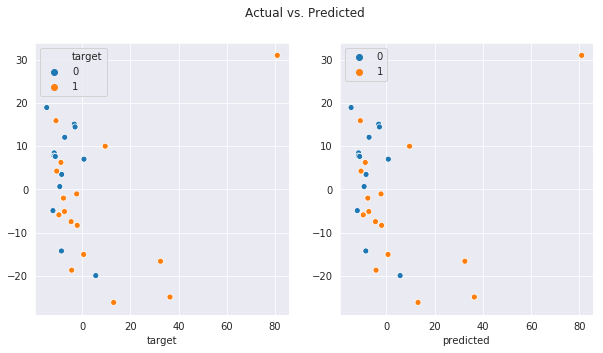

In [58]:
y_pred = model.fit(Data, target).predict(Data)

fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.scatterplot(bow_2D[:,0], bow_2D[:,1],
                hue=target, ax=axes[0])
axes[0].set_xlabel("target")

sns.scatterplot(bow_2D[:,0], bow_2D[:,1],
                hue=y_pred, ax=axes[1])
axes[1].set_xlabel("predicted")

fig.suptitle("Actual vs. Predicted")
plt.show;